In [6]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def plot_area(df, num_classes=7):
    for i in range(num_classes):
        ax = df[f'target_area{i}'].plot(label='target')
        df[f'forecast_area{i}'].plot(ax=ax, label='forecast')
        ax.set_title(f'SIC area for concenration class {i}')
        plt.legend()
        plt.show()

In [21]:
model_1 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/amsr2_grid/lead_time_1/weights_30010909.csv", index_col=0)
model_1.index = pd.to_datetime(model_1.index, format="%Y-%m-%d")
model_3 = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/amsr2_grid/lead_time_3/weights_30011419.csv", index_col=0)
model_3.index = pd.to_datetime(model_3.index, format="%Y-%m-%d")

In [30]:
model_1_ns = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_1/weights_30010909.csv", index_col=0)
model_1_ns.index = pd.to_datetime(model_1_ns.index, format="%Y-%m-%d")
model_3_ns = pd.read_csv("/lustre/storeB/users/arefk/MScThesis_AreKvanum2022_SeaIceML/PhysicalModels/Data/nextsim_grid/lead_time_3/weights_30011419.csv", index_col=0)
model_3_ns.index = pd.to_datetime(model_3_ns.index, format="%Y-%m-%d")

In [11]:
meteorological_seasons = [0,0,1,1,1,2,2,2,3,3,3,0] # D2022 substitutes D2021
seasonal_names = ['DJF', 'MAM', 'JJA', 'SON']

months = pd.date_range('2022-01-01','2023-01-01', freq='MS').strftime("%Y-%m-%d").tolist()

In [12]:
def group_by_months(df): 
    for i, idx in zip(range(len(months) - 1), meteorological_seasons):
        df.loc[(df.index >= months[i]) & (df.index < months[i+1]), 'met_index'] = seasonal_names[idx]
    
    return df

In [31]:
model_1_months = model_1.groupby(pd.Grouper(freq='M')).mean()
model_3_months = model_3.groupby(pd.Grouper(freq='M')).mean()
model_1_ns_months = model_1_ns.groupby(pd.Grouper(freq='M')).mean()
model_3_ns_months = model_3_ns.groupby(pd.Grouper(freq='M')).mean()

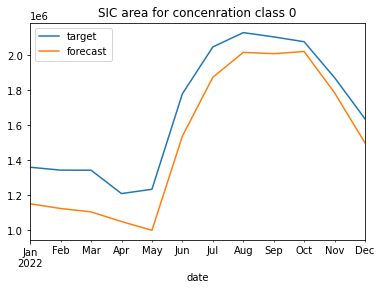

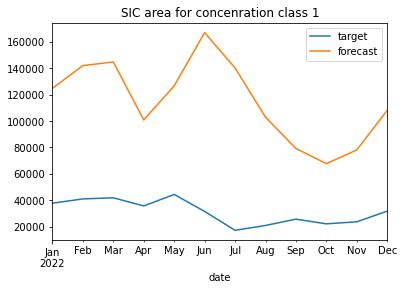

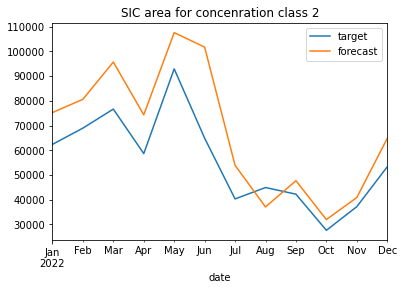

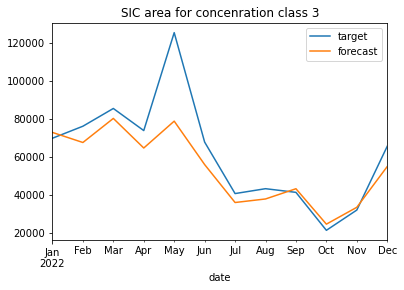

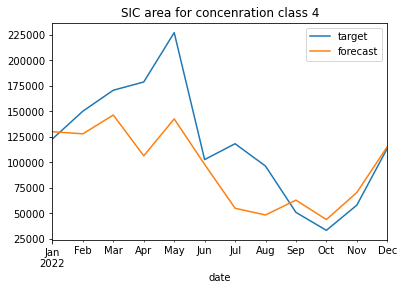

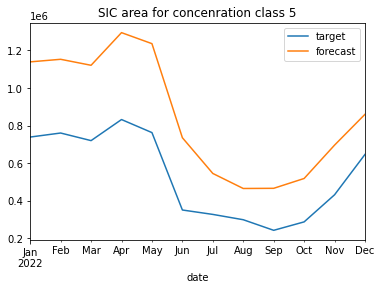

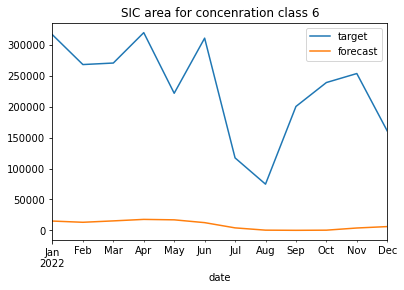

In [28]:
plot_area(model_1_months)

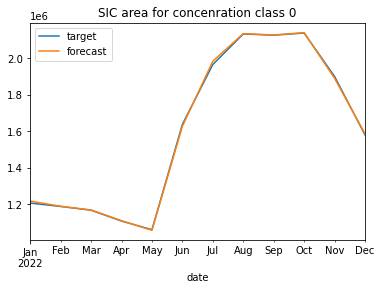

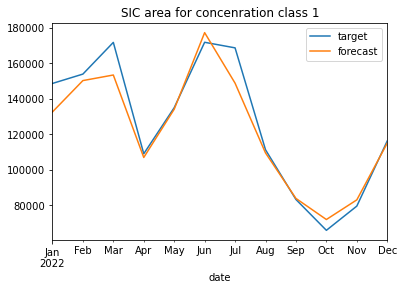

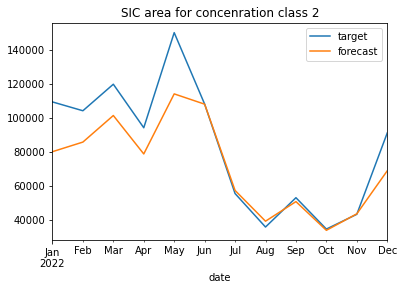

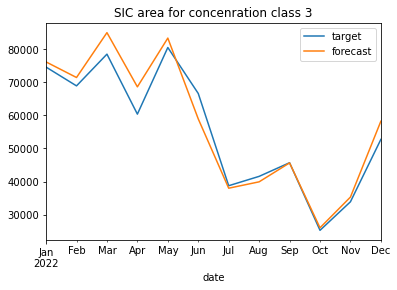

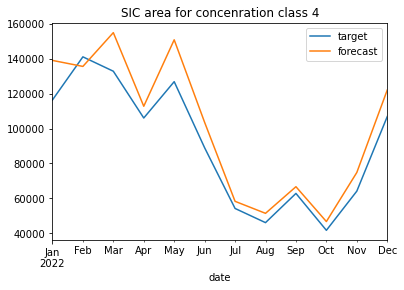

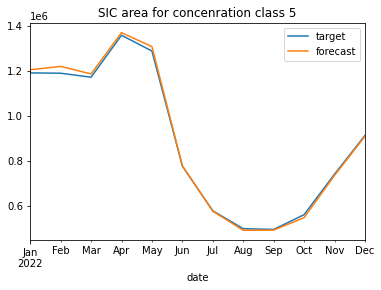

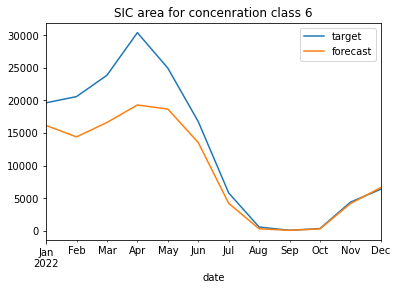

In [34]:
plot_area(model_1_ns_months)

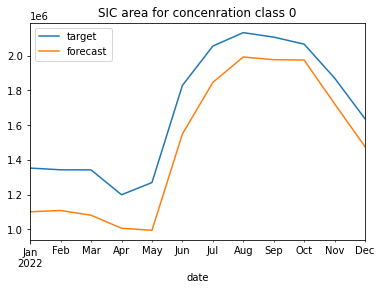

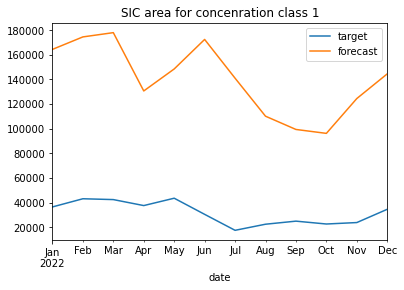

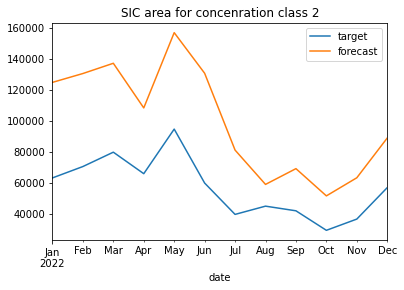

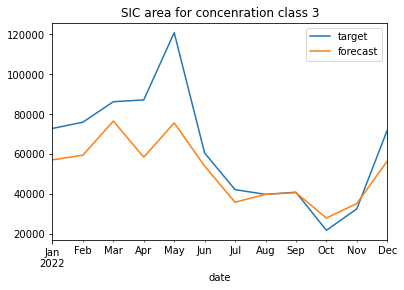

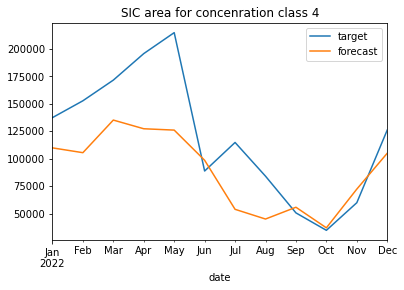

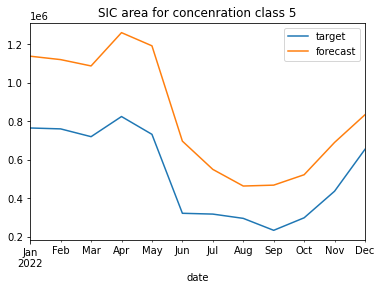

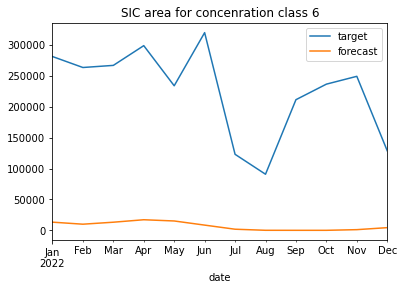

In [29]:
plot_area(model_3_months)

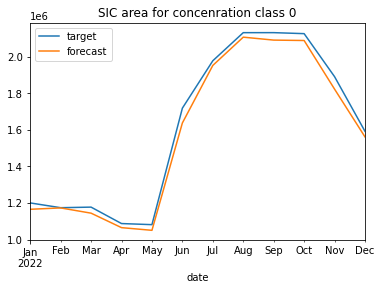

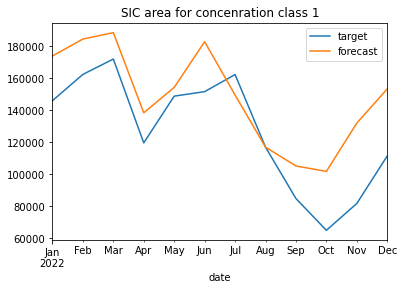

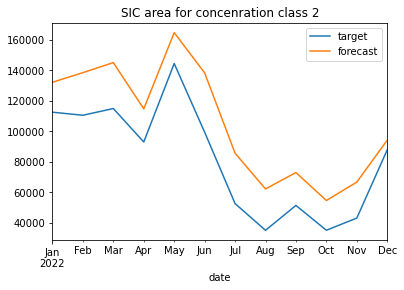

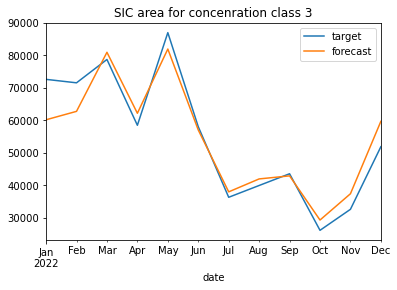

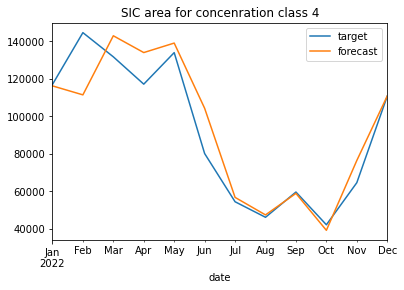

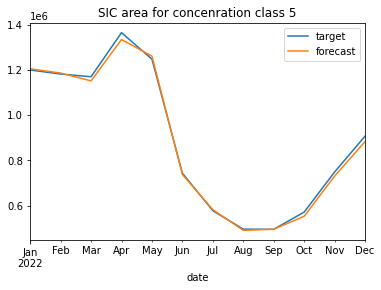

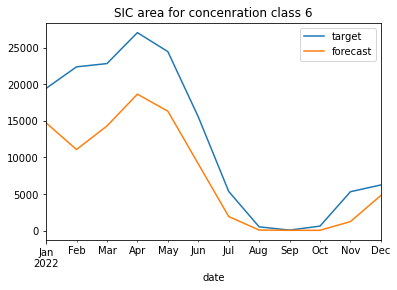

In [35]:
plot_area(model_3_ns_months)